## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Preprocessing

### Read & Explore The Data

In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


### Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

## Check Null

In [4]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

### Check Not Available

In [5]:
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

### Dropping Not Available values

In [6]:
# df.dropna(inplace=True)
# df['average price'].fillna(df['average price'].mean(), inplace=True)

### Check the dublicate data

In [7]:
print(f'Number of Dublicated data = {df.duplicated().sum()}')

Number of Dublicated data = 0


### Dropping Dublicates

In [8]:
# df.drop_duplicates(inplace=True)

### Check if there is a leading or trailing white spaces

In [9]:
def has_whitespace(x):
    return isinstance(x, str) and (x != x.strip())

whitespace_check = df.applymap(has_whitespace)
print(whitespace_check.sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


### Cleaning White Spaces

In [10]:
# remove_spaces = lambda x: x.strip() if isinstance(x, str) else x
# df = df.apply(remove_spaces)

In [11]:
df.rename(columns={'average price ': 'average price'}, inplace=True)

### Dropping columns

In [12]:
df.drop(columns=['Booking_ID','date of reservation'],inplace=True)


### Checking And Handling Outliers

- Calculate IQR range 
- Calculate lower and upper bounds that can be Considered
    - usually `1.5 * IQR` would be a good choice
        

In [13]:
temp = df.select_dtypes(include='number')
Q1 = temp.quantile(0.25)
Q3 = temp.quantile(0.75)
iqr = Q3 - Q1
print(iqr)
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

outliers_0 = (temp < lower_bound) | (temp > upper_bound)



number of adults              0.0
number of children            0.0
number of weekend nights      2.0
number of week nights         2.0
car parking space             0.0
lead time                   109.0
repeated                      0.0
P-C                           0.0
P-not-C                       0.0
average price                39.7
special requests              1.0
dtype: float64


### Outliers Before handling

In [14]:
outliers_0.sum()

number of adults            10175
number of children           2702
number of weekend nights       21
number of week nights         324
car parking space            1124
lead time                    1332
repeated                      930
P-C                           338
P-not-C                       812
average price                1696
special requests              762
dtype: int64

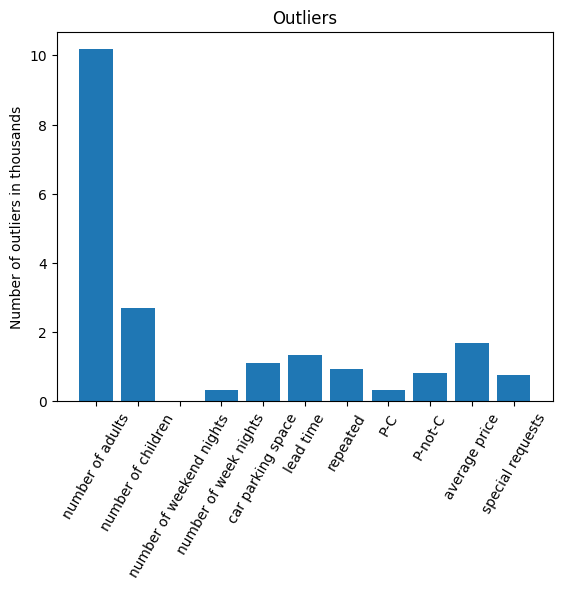

In [15]:
plt.bar(temp.columns,np.array(outliers_0.sum())/1000)
plt.xticks(rotation=60)
plt.ylabel('Number of outliers in thousands')
plt.title('Outliers')
plt.savefig('outliers_0.png')
plt.show()

### Dropping the outliers of `lead time` and `average price` features

In [16]:
data = df[(df['lead time']<upper_bound['lead time']) & (df['average price']<upper_bound['average price'])]
data.shape

(33887, 15)

In [17]:
temp = data.select_dtypes(include='number')
Q1 = temp.quantile(0.25)
Q3 = temp.quantile(0.75)
iqr = Q3 - Q1

lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

outliers_1 = ( (temp < lower_bound) | (temp > upper_bound) )

print(iqr)

number of adults              0.0
number of children            0.0
number of weekend nights      2.0
number of week nights         2.0
car parking space             0.0
lead time                   101.0
repeated                      0.0
P-C                           0.0
P-not-C                       0.0
average price                40.0
special requests              1.0
dtype: float64


### Outliers after handling lead time and average price outliers

- The number of outliers of lead time is dropped by 51% 
- The number of outliers of average price is dropped by 64%

In [18]:
outliers_1.sum()

number of adults            9682
number of children          2108
number of weekend nights      21
number of week nights        303
car parking space           1040
lead time                    650
repeated                     923
P-C                          332
P-not-C                      811
average price                618
special requests             706
dtype: int64

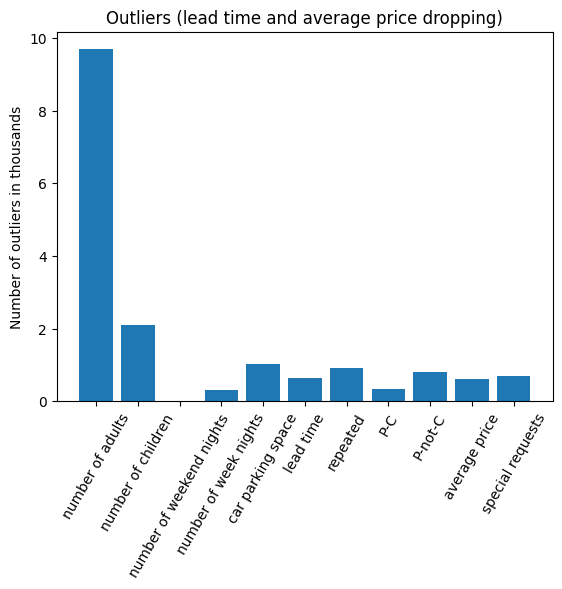

In [19]:
plt.bar(temp.columns,np.array(outliers_1.sum())/1000)
plt.xticks(rotation=60)
plt.ylabel('Number of outliers in thousands')
plt.title('Outliers (lead time and average price dropping)')
plt.savefig('outliers_1.png')
plt.show()

### Claculate outliers from Z-Score perspective

- Any data point with `z-score` greater than `3.5` will be considered an outlier

In [20]:
z_scores = (temp - np.mean(temp, axis=0)) / np.std(temp, axis=0)
print(z_scores.mean(axis=0))

number of adults           -2.054864e-17
number of children          2.358900e-17
number of weekend nights    4.308925e-17
number of week nights      -1.505503e-16
car parking space          -7.758161e-18
lead time                  -4.193601e-18
repeated                   -5.242001e-17
P-C                         6.290401e-18
P-not-C                    -8.177521e-18
average price               2.956488e-16
special requests           -4.927481e-17
dtype: float64


In [21]:
threshold = 3.5

# Find the rows where any z-score exceeds the threshold (positive or negative)
outliers_2 = np.abs(z_scores) > threshold 

# Get the indices of rows with outliers
outlier_indices = np.where(outliers_2.any(axis=1))[0]

# View the rows with outliers
outlier_data = data.iloc[outlier_indices]
print(outlier_data.shape[0])


2679


In [22]:
outliers_2.sum()

number of adults             141
number of children           573
number of weekend nights     170
number of week nights        195
car parking space           1040
lead time                      0
repeated                     923
P-C                          140
P-not-C                      231
average price                  0
special requests              82
dtype: int64

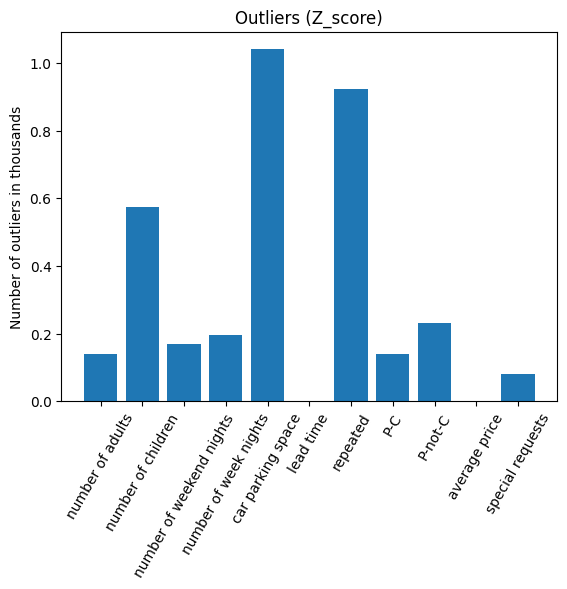

In [23]:
plt.bar(temp.columns,np.array(outliers_2.sum())/1000)
plt.xticks(rotation=60)
plt.ylabel('Number of outliers in thousands')
plt.title('Outliers (Z_score)')
plt.savefig('outliers_2.png')
plt.show()

### Droping any data point with `Z-Score` greater than `3.5`

In [24]:
data.reset_index(drop=True, inplace=True)
new_df = data.drop(index=outlier_indices)
new_df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33882,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled
33883,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,Not_Canceled
33884,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,Not_Canceled
33885,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,Not_Canceled


### Reviewing outliers again after the dropping

In [25]:
temp = new_df.select_dtypes(include='number')
z_scores_2 = (temp - np.mean(temp, axis=0)) / np.std(temp, axis=0)
print(z_scores_2.mean(axis=0))

number of adults           -1.161166e-16
number of children          6.170119e-17
number of weekend nights    2.185725e-17
number of week nights       1.040496e-16
car parking space                    NaN
lead time                  -4.576362e-17
repeated                             NaN
P-C                                  NaN
P-not-C                              NaN
average price              -5.370964e-16
special requests            8.219236e-17
dtype: float64


In [26]:
threshold = 3.5
outliers_3 = np.abs(z_scores_2) > threshold 

# Get the indices of rows with outliers
outlier_indices_1 = np.where(outliers_3.any(axis=1))[0]

# View the rows with outliers
outlier_data_1 = new_df.iloc[outlier_indices_1]
print(outlier_data_1.shape[0])

1528


In [27]:
outliers_3.sum()

number of adults               0
number of children          1442
number of weekend nights       0
number of week nights         92
car parking space              0
lead time                      0
repeated                       0
P-C                            0
P-not-C                        0
average price                  0
special requests               0
dtype: int64

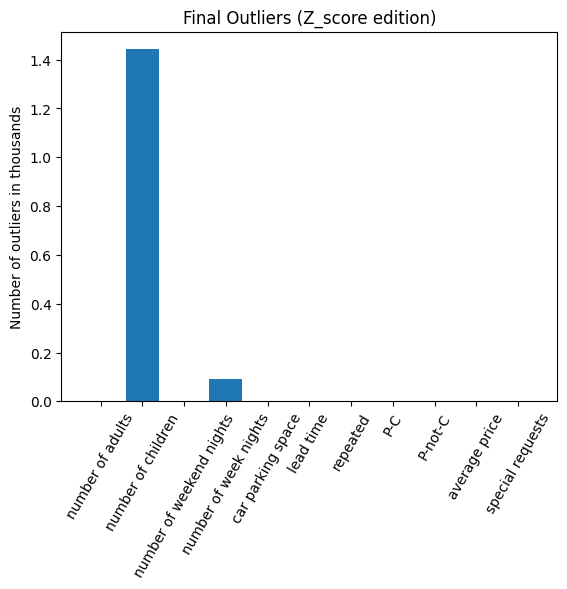

In [28]:
plt.bar(temp.columns,np.array(outliers_3.sum())/1000)
plt.xticks(rotation=60)
plt.ylabel('Number of outliers in thousands')
plt.title('Final Outliers (Z_score edition)')
plt.savefig('outliers_3.png')
plt.show()

In [29]:
temp = new_df.select_dtypes(include='number')
Q1 = temp.quantile(0.25)
Q3 = temp.quantile(0.75)
iqr = Q3 - Q1

lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

outliers_4 = (temp < lower_bound) | (temp > upper_bound)

print(iqr)

number of adults              0.00
number of children            0.00
number of weekend nights      2.00
number of week nights         2.00
car parking space             0.00
lead time                   100.00
repeated                      0.00
P-C                           0.00
P-not-C                       0.00
average price                38.35
special requests              1.00
dtype: float64


In [30]:
outliers_4.sum()

number of adults            8488
number of children          1442
number of weekend nights       0
number of week nights         92
car parking space              0
lead time                    623
repeated                       0
P-C                            0
P-not-C                        0
average price                511
special requests             542
dtype: int64

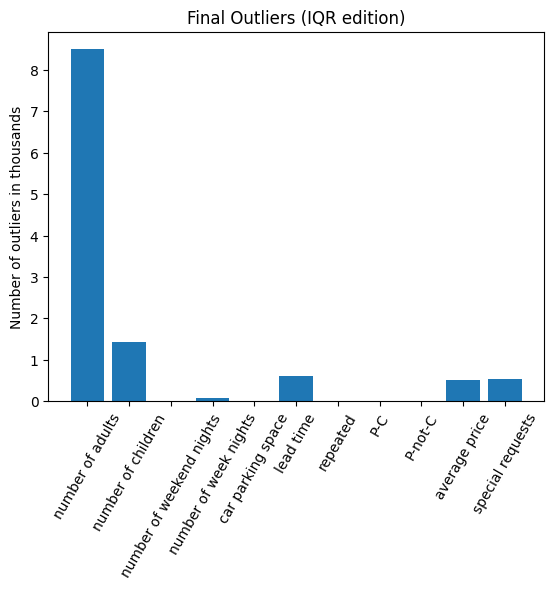

In [31]:
plt.bar(temp.columns,np.array(outliers_4.sum())/1000)
plt.xticks(rotation=60)
plt.ylabel('Number of outliers in thousands')
plt.title('Final Outliers (IQR edition)')
plt.savefig('outliers_4.png')
plt.show()

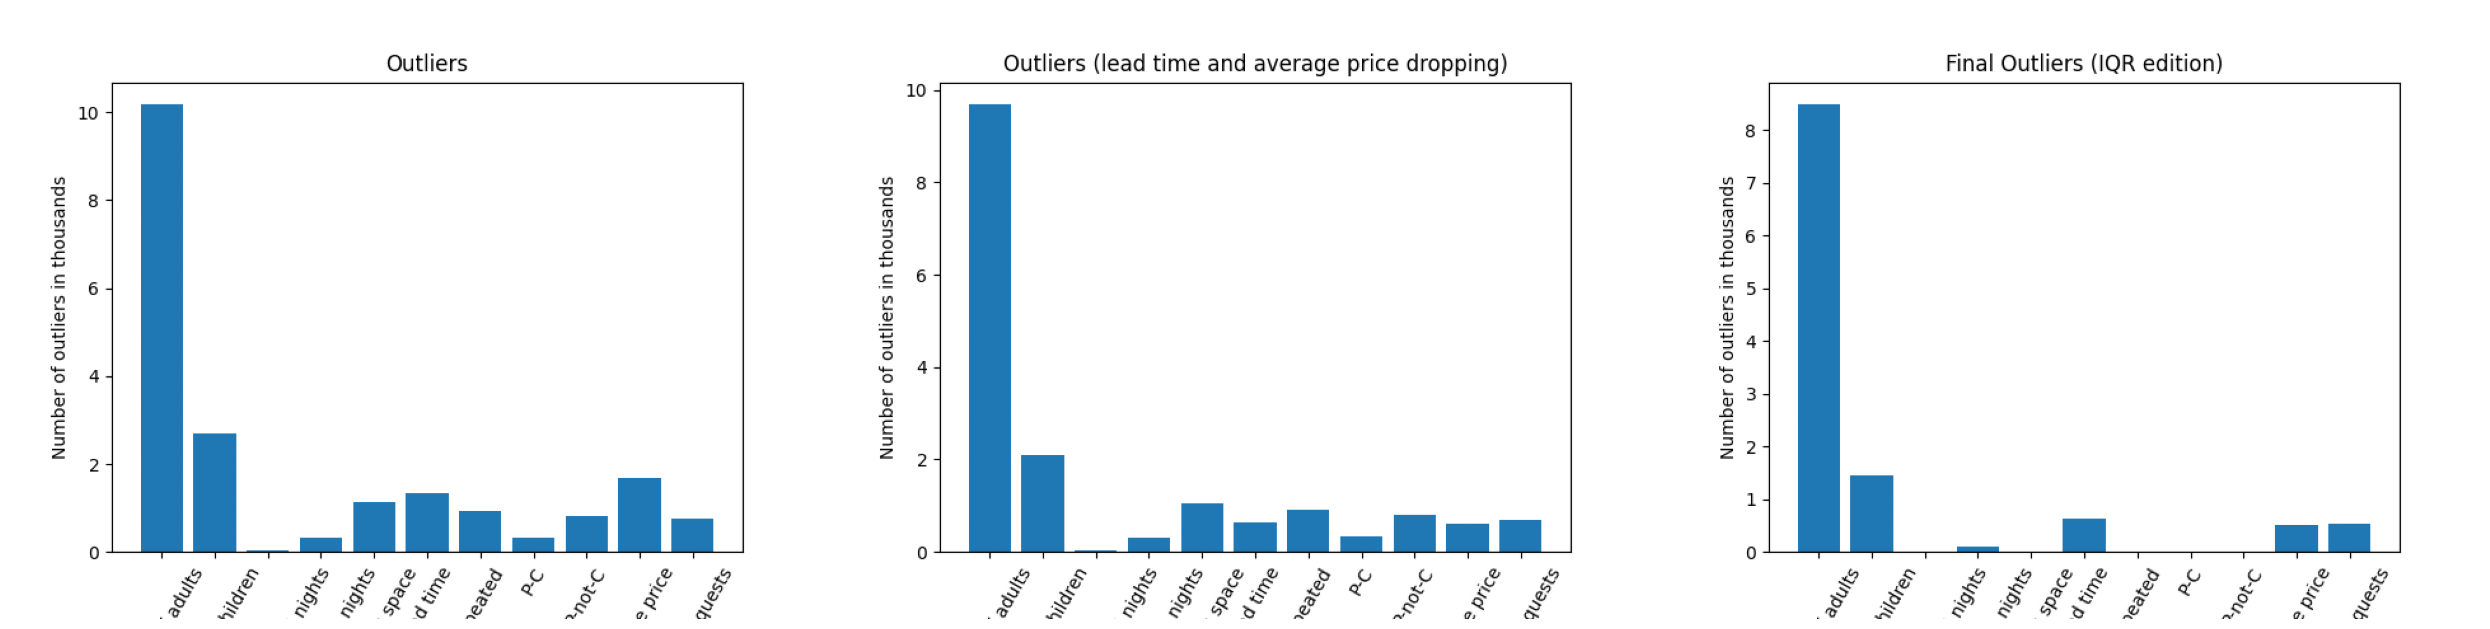

In [32]:
import matplotlib.image as mpimg

image1 = mpimg.imread('outliers_0.png')
image2 = mpimg.imread('outliers_1.png')
image3 = mpimg.imread('outliers_4.png')

fig, axes = plt.subplots(1, 3, figsize=(25, 15))

axes[0].imshow(image1)
axes[0].axis('off')

axes[1].imshow(image2)
axes[1].axis('off')

axes[2].imshow(image3)
axes[2].axis('off')

plt.tight_layout()
plt.show()


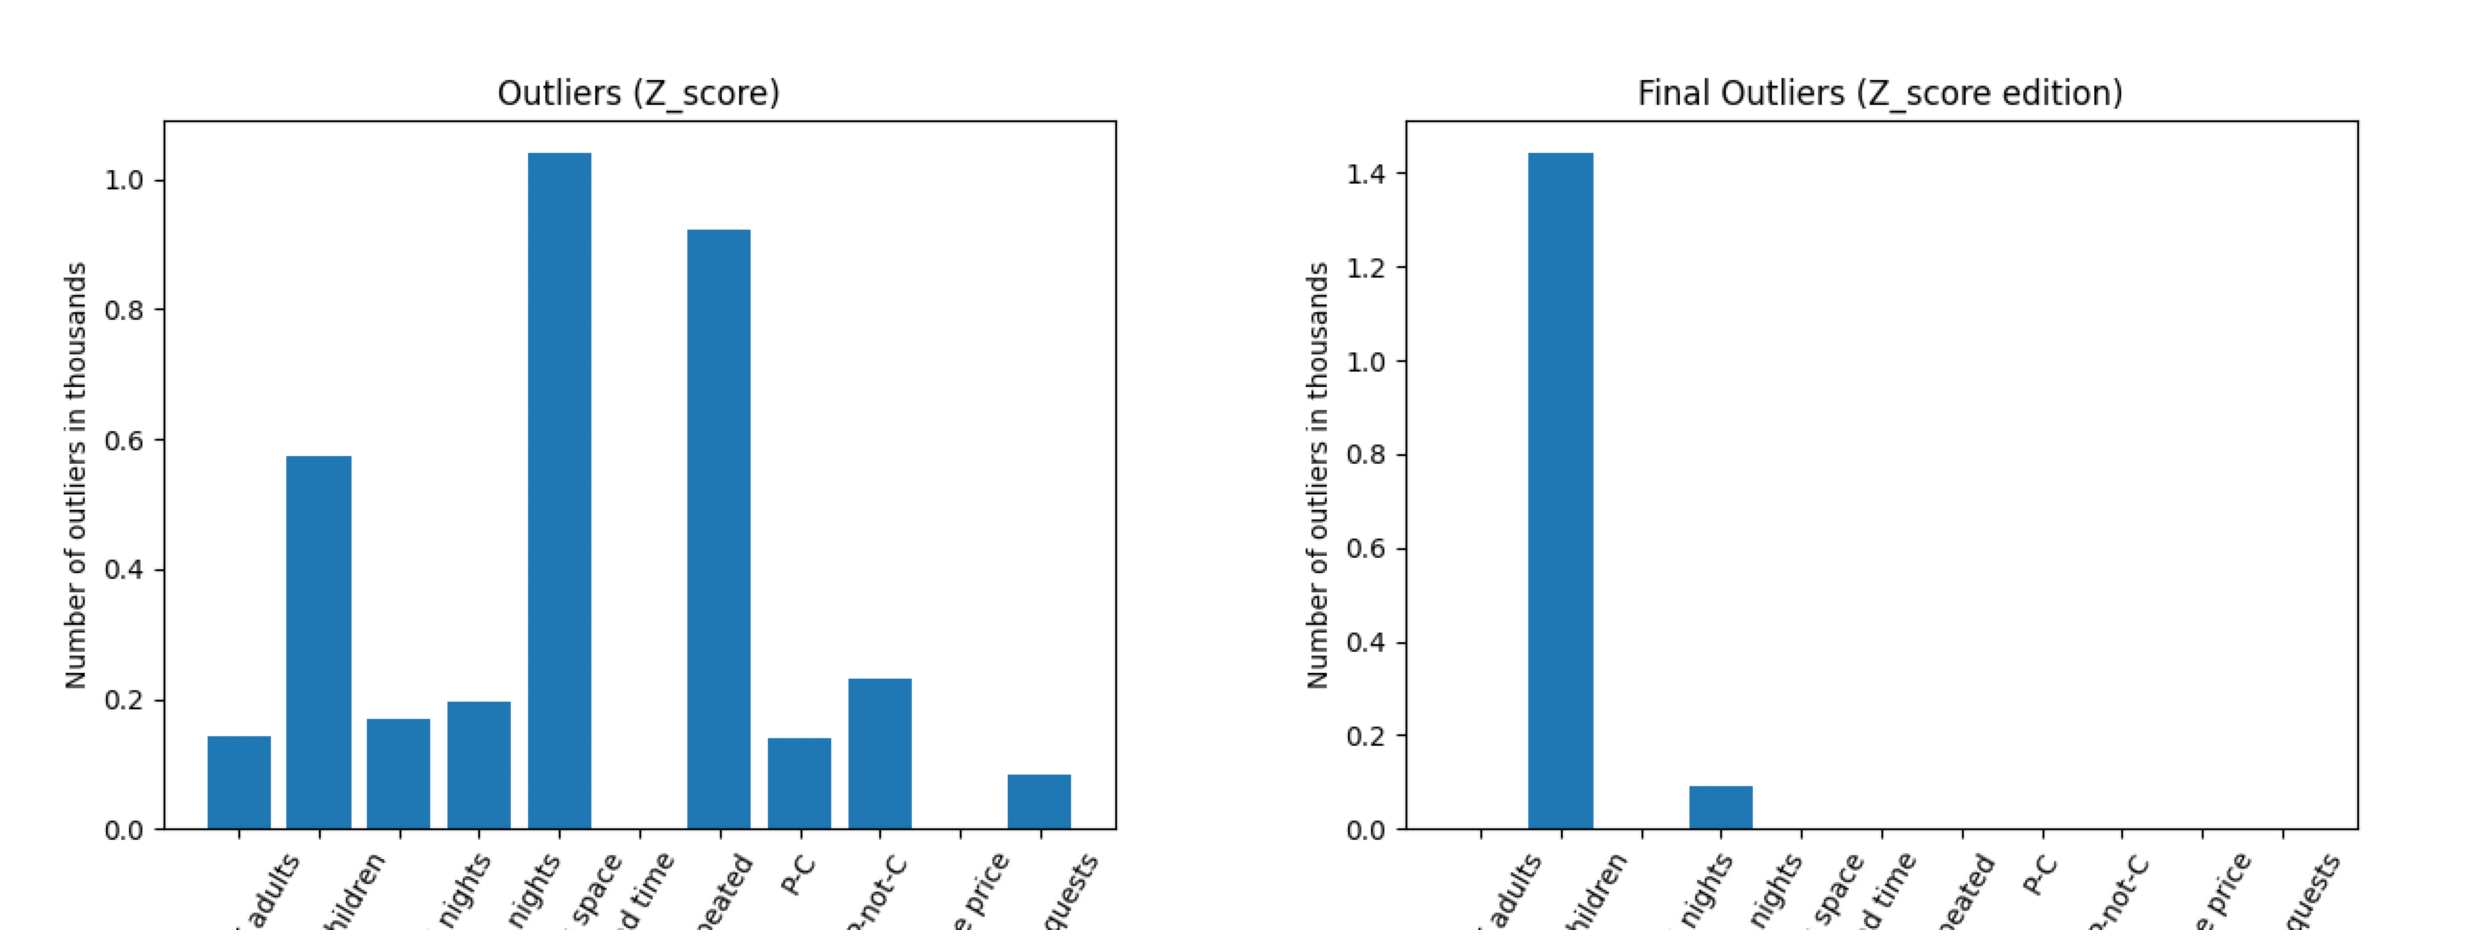

In [33]:
image1 = mpimg.imread('outliers_2.png')
image2 = mpimg.imread('outliers_3.png')

fig, axes = plt.subplots(1, 2, figsize=(25, 15))

axes[0].imshow(image1)
axes[0].axis('off')

axes[1].imshow(image2)
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [34]:
new_df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33882,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled
33883,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,Not_Canceled
33884,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,Not_Canceled
33885,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,Not_Canceled


### Transformation for the Categorical Data

- Transformed `market segment type` feature with `One-Hot Encoding`

- Transformed `['room type','type of meal']` features with `Ordinal Encoding`

- Transformed `booking status` feature with `Binary Encoding`

In [35]:
room_type_mapping = {'Room_Type 1': 1,'Room_Type 2': 2,'Room_Type 3': 3,'Room_Type 4': 4,'Room_Type 5': 5,'Room_Type 6': 6,'Room_Type 7': 7}

new_df['room type'] = new_df['room type'].replace(room_type_mapping)

new_df['room type'].value_counts()

room type
1    25015
4     5417
2      448
5      197
6      101
7       23
3        7
Name: count, dtype: int64

In [36]:
meal_type_mapping = {'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3}

new_df['type of meal'] = new_df['type of meal'].replace(meal_type_mapping)

new_df['type of meal'].value_counts()

type of meal
1    23870
0     4864
2     2472
3        2
Name: count, dtype: int64

In [37]:
new_df['booking status'] = new_df['booking status'].replace({'Not_Canceled' : 0, 'Canceled' : 1})
new_df['booking status'].value_counts()

booking status
0    21273
1     9935
Name: count, dtype: int64

In [38]:
final_df = pd.get_dummies(new_df, columns=['market segment type']).astype(int)
final_df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,1,0,1,224,0,0,0,88,0,0,0,0,0,1,0
1,1,0,1,3,0,0,1,5,0,0,0,106,1,0,0,0,0,0,1
2,2,1,1,3,1,0,1,1,0,0,0,50,0,1,0,0,0,0,1
3,1,0,0,2,1,0,1,211,0,0,0,100,1,1,0,0,0,0,1
4,1,0,1,2,0,0,1,48,0,0,0,77,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33882,2,0,1,1,0,0,1,48,0,0,0,94,0,1,0,0,0,0,1
33883,2,0,1,3,1,0,1,34,0,0,0,107,1,0,0,0,0,0,1
33884,2,0,1,3,1,0,4,83,0,0,0,105,1,0,0,0,0,0,1
33885,3,0,0,4,1,0,1,121,0,0,0,96,1,0,0,0,0,1,0


### Feature Selection

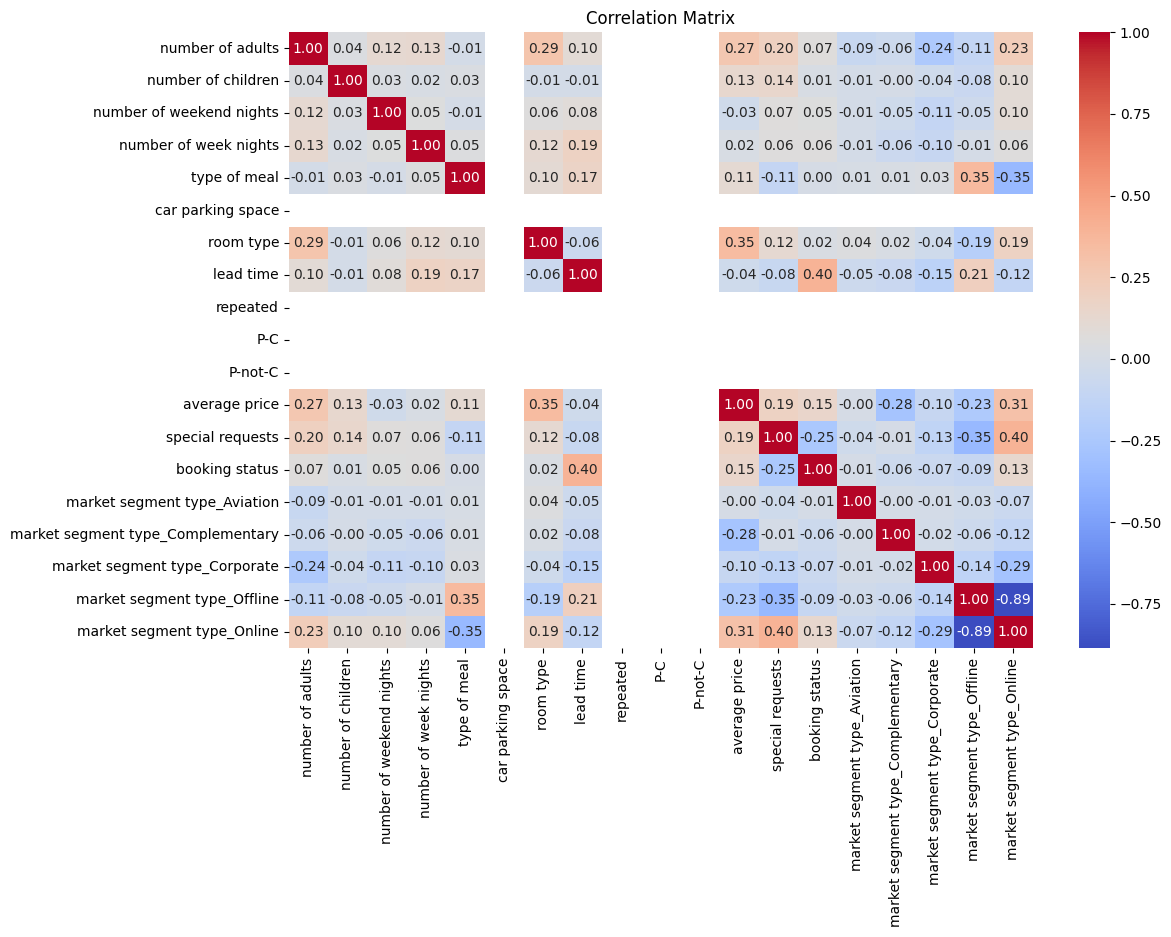

In [39]:
corr_mat = final_df.corr()
corr_mat
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Using chi-square test to select best features

In [40]:
from sklearn.feature_selection import SelectKBest, chi2

X = final_df.drop(columns=['booking status'])
y = final_df['booking status']
for i in range(1,8):
    chi2_selector = SelectKBest(chi2, k=i)
    X_new = chi2_selector.fit_transform(X, y)

    chi2_scores = chi2_selector.scores_
    chi2_pvalues = chi2_selector.pvalues_

    # for i, score in enumerate(chi2_scores):
    #     print(f"Feature {X.columns[i]} - Chi-Squared Score: {score}, p-value: {chi2_pvalues[i]}")

    selected_features = X.columns[chi2_selector.get_support()]
    
    selected = []
    for j in range(i):
        selected.append(selected_features[j])
    print(f"Best {i} Selected Features: {selected}")


Best 1 Selected Features: ['lead time']
Best 2 Selected Features: ['lead time', 'average price']
Best 3 Selected Features: ['lead time', 'average price', 'special requests']
Best 4 Selected Features: ['lead time', 'average price', 'special requests', 'market segment type_Offline']
Best 5 Selected Features: ['lead time', 'average price', 'special requests', 'market segment type_Offline', 'market segment type_Online']
Best 6 Selected Features: ['lead time', 'average price', 'special requests', 'market segment type_Corporate', 'market segment type_Offline', 'market segment type_Online']
Best 7 Selected Features: ['lead time', 'average price', 'special requests', 'market segment type_Complementary', 'market segment type_Corporate', 'market segment type_Offline', 'market segment type_Online']


In [41]:
# from sklearn.utils import resample

# df_minority = final_df[final_df['booking status'] == 1]
# df_majority = final_df[final_df['booking status'] == 0]

# df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_minority)*3, random_state=42)

# df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [42]:
# arr = ['lead time', 'average price', 'special requests', 'market segment type_Corporate'
#        , 'market segment type_Offline', 'market segment type_Online','number of week nights','number of weekend nights']

# for i in arr:
#     print(f"min: {np.min(final_df[i])}, max: {np.max(final_df[i])} of feature {i}")

### Feature Engineering 

- Adding some features to make the model a little bit accurate

In [43]:
ratio = np.where(final_df['number of week nights'] != 0, final_df['number of weekend nights'] / final_df['number of week nights'] , 0)
ratio2 = np.where(final_df['average price'] != 0, final_df['lead time'] / final_df['average price'], -1)
ratio3 = final_df['market segment type_Online'] * final_df['lead time'] * final_df['special requests']
ratio4 = final_df['market segment type_Online'] * final_df['lead time'] * final_df['average price']
guests = final_df['number of adults'] + final_df['number of children']
ratio5 = np.where(final_df['number of weekend nights'] != 0, final_df['average price'] / guests / final_df['number of weekend nights'], -1)

x = final_df[['lead time', 'average price', 'special requests', 'market segment type_Corporate', 'market segment type_Offline', 'market segment type_Online',]]

x['weekend_ratio'] = ratio
x['time_price_ratio'] = ratio2
x['time_requests_online'] = ratio3
x['time_price_online'] = ratio4
x['extra_price'] = (final_df['average price'])
x['extra_time'] = (final_df['lead time'])
x['extra_requests'] = (final_df['special requests'])

y = final_df['booking status']

### Spliting the data to train data and test data

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=42)

### Initializing the model `(Logistic Regression Model)`

In [45]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)

### Training the model

In [46]:
classifier.fit(x_train,y_train)

LogisticRegression(random_state=42)

### Making predictions on the test data

In [47]:
y_pred = classifier.predict(x_test)

### Measuring the accurecy of the model `(How well the model perform with a new unseen dataset)`

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print(f'accuracy of the model = {accuracy_score(y_test,y_pred)*100:.2f}')
print(f'accuracy of the model on training data = {accuracy_score(y_train,classifier.predict(x_train))*100:.2f}')

accuracy of the model = 80.86
accuracy of the model on training data = 79.87


In [49]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[5778  612]
 [1180 1793]]


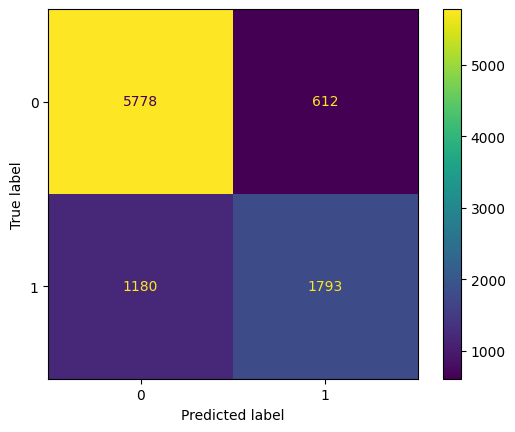

In [50]:
_ = ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

In [51]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      6390
           1       0.75      0.60      0.67      2973

    accuracy                           0.81      9363
   macro avg       0.79      0.75      0.77      9363
weighted avg       0.80      0.81      0.80      9363



### Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators = 200,max_depth = 16, min_samples_split = 5).fit(x_train,y_train)

In [53]:
y_predict = random_forest_model.predict(x_test)
print(f'accuracy of the model = {accuracy_score(y_test,y_predict)*100:.2f}')
print(f'accuracy of the model on training data = {accuracy_score(y_train,random_forest_model.predict(x_train))*100:.2f}')

accuracy of the model = 87.46
accuracy of the model on training data = 92.89


In [54]:
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[5940  450]
 [ 724 2249]]


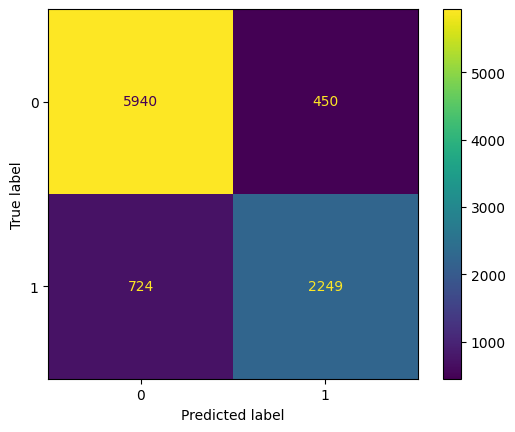

In [55]:
_ = ConfusionMatrixDisplay.from_estimator(random_forest_model, x_test, y_test)

In [56]:
cr = classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6390
           1       0.83      0.76      0.79      2973

    accuracy                           0.87      9363
   macro avg       0.86      0.84      0.85      9363
weighted avg       0.87      0.87      0.87      9363



In [57]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators = 850, learning_rate = 0.01, random_state = 42)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [58]:
y_predict2 = xgb_model.predict(x_test)
print(f'accuracy of the model = {accuracy_score(y_test,y_predict2)*100:.2f}')
print(f'accuracy of the model on training data = {accuracy_score(y_train,xgb_model.predict(x_train))*100:.2f}')

accuracy of the model = 86.28
accuracy of the model on training data = 86.51


In [59]:
cm = confusion_matrix(y_test,y_predict2)
print(cm)

[[5916  474]
 [ 811 2162]]


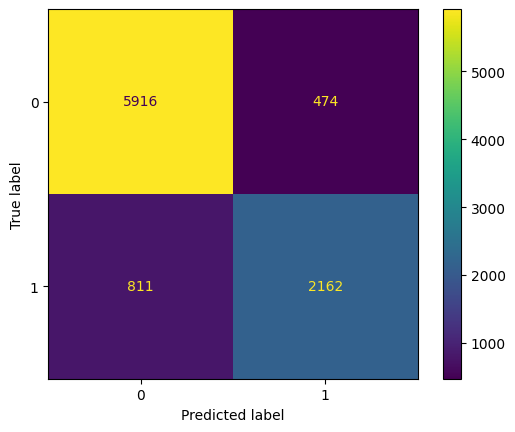

In [60]:
_ = ConfusionMatrixDisplay.from_estimator(xgb_model, x_test, y_test)

In [61]:
cr = classification_report(y_test,y_predict2)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6390
           1       0.82      0.73      0.77      2973

    accuracy                           0.86      9363
   macro avg       0.85      0.83      0.84      9363
weighted avg       0.86      0.86      0.86      9363

